In [1]:
import os
import re
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import os
import time
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')

In [1]:
FED_list = []

ev_txt = open('ev_txt.txt', mode = 'w')

for pnum in range(1,20000):
    link = 'https://fred.stlouisfed.org/tags/series?et=&ob=pv&od=desc&pageID='+str(pnum)+'&t=usa'
    r = requests.get(link)
    soup = BeautifulSoup(r.content, 'html.parser')
    EVs = soup.find_all('tr', class_=re.compile('series-pager-title'))
    for EV in EVs:
        text = str(EV.text).strip().lower()
        processed = nlp(text)
        for nc in processed.noun_chunks:
            #print(nc)
            ev_txt.write(nc.text +' \n')


"\nev_txt = open('ev_txt.txt', mode = 'w')\n\nfor pnum in range(1,20000):\n    link = 'https://fred.stlouisfed.org/tags/series?et=&ob=pv&od=desc&pageID='+str(pnum)+'&t=usa'\n    r = requests.get(link)\n    soup = BeautifulSoup(r.content, 'html.parser')\n    EVs = soup.find_all('tr', class_=re.compile('series-pager-title'))\n    for EV in EVs:\n        text = str(EV.text).strip().lower()\n        processed = nlp(text)\n        for nc in processed.noun_chunks:\n            #print(nc)\n            ev_txt.write(nc.text +' \n')\n"

In [2]:
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS 
EV_list = []
EV_count = {}
phrase_model = Phrases(FED_list, min_count=1, threshold=1, connector_words=ENGLISH_CONNECTOR_WORDS)
phraser = phrase_model.freeze()
for sentence in FED_list:
    for phrase in phraser[sentence]:
        
        if phrase not in spacy_stopwords and len(phrase.strip())>2:
            if phrase in EV_count:
                EV_count[phrase]+= 1
            else:
                EV_count[phrase] = 1


'from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS\nspacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS \nEV_list = []\nEV_count = {}\nphrase_model = Phrases(FED_list, min_count=1, threshold=1, connector_words=ENGLISH_CONNECTOR_WORDS)\nphraser = phrase_model.freeze()\nfor sentence in FED_list:\n    for phrase in phraser[sentence]:\n        \n        if phrase not in spacy_stopwords and len(phrase.strip())>2:\n            if phrase in EV_count:\n                EV_count[phrase]+= 1\n            else:\n                EV_count[phrase] = 1'

(array([337., 188.,  53.,  35.,   0.,  22.,  13.,  12.,   0.,   0.,   4.,
          2.,   7.,   4.,   0.,   1.,   2.,   3.,   0.,   0.,   1.,   2.,
          1.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 1.  ,  1.79,  2.58,  3.37,  4.16,  4.95,  5.74,  6.53,  7.32,
         8.11,  8.9 ,  9.69, 10.48, 11.27, 12.06, 12.85, 13.64, 14.43,
        15.22, 16.01, 16.8 , 17.59, 18.38, 19.17, 19.96, 20.75, 21.54,
        22.33, 23.12, 23.91, 24.7 , 25.49, 26.28, 27.07, 27.86, 28.65,
        29.44, 30.23, 31.02, 31.81

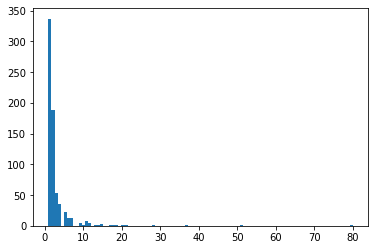

In [59]:
FED_list = []

ev_txt = open('ev_txt.txt', mode = 'w')

for pnum in range(1,20000):
    link = 'https://fred.stlouisfed.org/tags/series?et=&ob=pv&od=desc&pageID='+str(pnum)+'&t=usa'
    r = requests.get(link)
    soup = BeautifulSoup(r.content, 'html.parser')
    EVs = soup.find_all('tr', class_=re.compile('series-pager-title'))
    for EV in EVs:
        text = str(EV.text).strip().lower()
        processed = nlp(text)
        for nc in processed.noun_chunks:
            #print(nc)
            ev_txt.write(nc.text +' \n')

    print(pnum)

In [ ]:
EV